In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense, Flatten,Conv2D, MaxPool2D
from keras.models import Model
from keras.preprocessing import image
import cv2
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models  import Sequential
import splitfolders
from zipfile import ZipFile
from google.colab import files
from IPython.display import Image
import os.path
import pickle

In [ ]:
file_name="VIP2.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
input="/content/VIP2"
output="/content/VIP2/DIVIDED"
splitfolders.ratio(input,output,seed=42,ratio=(.8,.2,))

Copying files: 197 files [00:00, 3418.30 files/s]


In [ ]:
train_path='/content/VIP2/DIVIDED/train'
valid_path='/content/VIP2/DIVIDED/val'
img_size=[200,200]

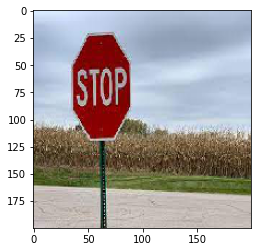

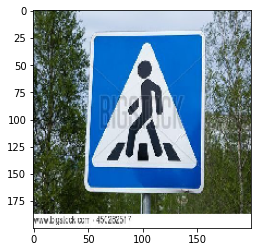

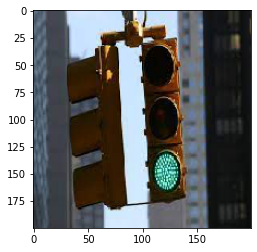

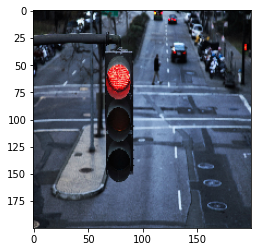

In [ ]:
stop='/content/VIP2/DIVIDED/train/Stop sign/images (4).jfif'
zebra='/content/VIP2/DIVIDED/train/Zebra/450282517.jpg'
green='/content/VIP2/DIVIDED/train/green/download (10).jfif'
red='/content/VIP2/DIVIDED/train/red/190829-red-light-mc-11482.jfif'
listimiz=[stop,zebra,green,red]
for i in listimiz:
  img=image.load_img(i,target_size=img_size)
  plt.imshow(img)
  plt.show()

In [ ]:
train=ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.10,
                         height_shift_range=0.10,
                         rescale=1/255,
                         shear_range=0.1,
                         zoom_range=0.1,
                         horizontal_flip=True,)
                         
validation=ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.10,
                         height_shift_range=0.10,
                         rescale=1/255,
                         shear_range=0.1,
                         zoom_range=0.1,
                         horizontal_flip=True,
                         fill_mode='nearest')

In [ ]:
train_data=train.flow_from_directory(train_path,
                                     target_size=img_size,
                                     batch_size=15,
                                     class_mode='categorical')

validation_data=validation.flow_from_directory(train_path,
                                     target_size=img_size,
                                     batch_size=15,
                                     class_mode='categorical')

Found 72 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'Stop sign': 0, 'Zebra': 1, 'green': 2, 'red': 3}

In [ ]:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 3, 3, 3, 3], dtype=int32)

In [ ]:
model=Sequential([Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                  MaxPool2D(2,2),

                  Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                  MaxPool2D(2,2),

                  Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                  MaxPool2D(2,2),

                  Flatten(),
                  Dense(16,activation='relu'),
                  Dense(32,activation='relu'),
                  Dense(64,activation='relu'),
                  
                  Dense(4,activation='softmax')
                  ])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,validation_data=validation_data,epochs=25)

Epoch 1/25
5/5 [==============================] - 17s 712ms/step - loss: 1.2191 - accuracy: 0.3333 - val_loss: 1.0561 - val_accuracy: 0.4028
Epoch 2/25
5/5 [==============================] - 3s 621ms/step - loss: 1.0535 - accuracy: 0.4028 - val_loss: 1.0211 - val_accuracy: 0.5000
Epoch 3/25
5/5 [==============================] - 3s 627ms/step - loss: 1.0094 - accuracy: 0.5000 - val_loss: 0.9607 - val_accuracy: 0.5000
Epoch 4/25
5/5 [==============================] - 3s 627ms/step - loss: 0.9802 - accuracy: 0.5000 - val_loss: 0.9114 - val_accuracy: 0.5000
Epoch 5/25
5/5 [==============================] - 3s 637ms/step - loss: 0.9149 - accuracy: 0.5000 - val_loss: 0.8486 - val_accuracy: 0.5000
Epoch 6/25
5/5 [==============================] - 3s 639ms/step - loss: 0.8390 - accuracy: 0.5556 - val_loss: 0.7794 - val_accuracy: 0.7500
Epoch 7/25
5/5 [==============================] - 3s 621ms/step - loss: 0.7712 - accuracy: 0.6944 - val_loss: 0.6667 - val_accuracy: 0.6944
Epoch 8/25
5/5 [===

In [ ]:
if os.path.isfile('/content/VIP2.h5') is False:
  model.save('/content/VIP2.h5')

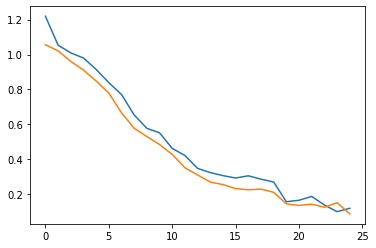

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.show()

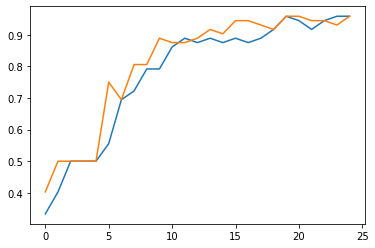

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.show()

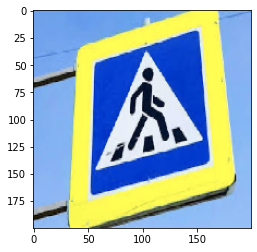

Road Crossing


In [ ]:
image_path='/content/VIP2/Zebra/road144.png'
img_plot=image.load_img(image_path,target_size=(200,200))
plt.imshow(img_plot)
plt.show()

X=image.img_to_array(img_plot)
X=np.expand_dims(X,axis=0)
test=model.predict(X)
if np.argmax(test)==1:
  print('Road Crossing')
elif np.argmax(test)==0:
  print('Stop')
elif np.argmax(test)==2:
  print('Traffic light is green')
elif np.argmax(test)==3:
  print('Traffic light is red')

In [ ]:
# STORE THE MODEL AS A PICKLE OBJECT
pickle_out= open("model_trained.p","wb")  # wb = WRITE BYTE
pickle.dump(model,pickle_out)
pickle_out.close()

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import cv2
import pickle
 
#############################################
 
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
 
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
# IMPORT THE TRANNIED MODEL
pickle_in=open("model_trained.p","rb")  ## rb = READ BYTE
model=pickle.load(pickle_in)
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Stop'
    elif classNo == 1: return 'Road Crossing'
    elif classNo == 2: return 'Traffic light is green'
    elif classNo == 3: return 'Traffic light is red'

 
while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()
    
    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
  
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
    #print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)
    
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break